# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [39]:
# Your code here.
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})
student_data

X   Y
0  17  10
1  51   1
2  27   5
3  21   9
4  36   4
5  48   2
6  19   9
7  26   6
8  54   0
9  30   3

Draw a dispersion diagram (scatter plot) for the data.

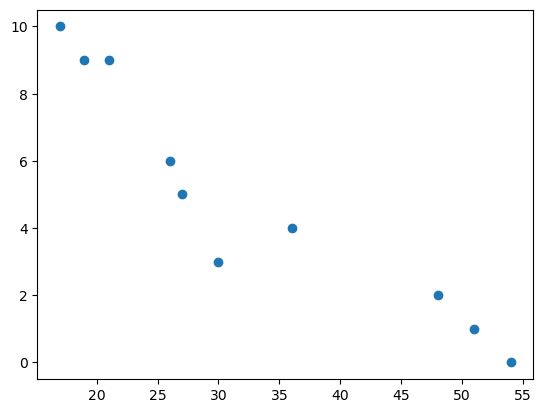

In [21]:
# Your code here.
plt.scatter(student_data['X'],student_data['Y'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
# Seems that the theory is quite accurate since we can see a strong correlation between the age and tardiness
# the lower the age, the bigger the tardiness

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [22]:
# Your response here.
#correlation:
print(stats.pearsonr(student_data["X"],student_data["Y"])[0])
#covariance:

print(student_data.cov)

-0.939162688688712
<bound method DataFrame.cov of     X   Y
0  17  10
1  51   1
2  27   5
3  21   9
4  36   4
5  48   2
6  19   9
7  26   6
8  54   0
9  30   3>


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [48]:
# Your response here.
x = student_data[["X"]]
y = student_data[["Y"]]

In [49]:
model = linear_model.LinearRegression()

In [50]:
result = model.fit(x,y)

Plot your regression model on your scatter plot.

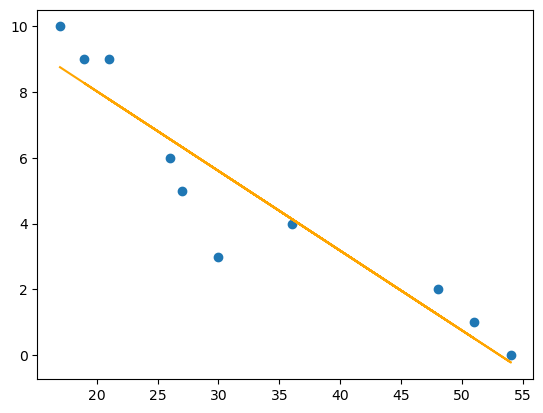

In [51]:
# Your code here.
regression_line = result.intercept_ + result.coef_[0] * x
plt.scatter(x,y)
plt.plot(x,regression_line, c="orange")
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [53]:
# Your response here. 
result.score(x,y)

# the r-squared value is fairly close to 1 so we can say that age is a good predictor of tardiness

0.8820265558250109

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [55]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")
vehicles.head(2)

Make              Model  Year  Engine Displacement  Cylinders  \
0  AM General  DJ Po Vehicle 2WD  1984                  2.5        4.0   
1  AM General   FJ8c Post Office  1984                  4.2        6.0   

      Transmission     Drivetrain                Vehicle Class Fuel Type  \
0  Automatic 3-spd  2-Wheel Drive  Special Purpose Vehicle 2WD   Regular   
1  Automatic 3-spd  2-Wheel Drive  Special Purpose Vehicle 2WD   Regular   

   Fuel Barrels/Year  City MPG  Highway MPG  Combined MPG  \
0          19.388824        18           17            17   
1          25.354615        13           13            13   

   CO2 Emission Grams/Mile  Fuel Cost/Year  
0               522.764706            1950  
1               683.615385            2550

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [58]:
# Your response here. 
vehicles.corr()

# the most important variable will be Fuel Barrel/Year since they have the strongest correlation
# the least helpful will be the Year

Year  Engine Displacement  Cylinders  \
Year                     1.000000             0.037876   0.082469   
Engine Displacement      0.037876             1.000000   0.901858   
Cylinders                0.082469             0.901858   1.000000   
Fuel Barrels/Year       -0.221084             0.789752   0.739517   
City MPG                 0.161818            -0.740317  -0.703866   
Highway MPG              0.267259            -0.715039  -0.650287   
Combined MPG             0.204751            -0.746782  -0.698648   
CO2 Emission Grams/Mile -0.222300             0.803520   0.752393   
Fuel Cost/Year          -0.091913             0.769678   0.778153   

                         Fuel Barrels/Year  City MPG  Highway MPG  \
Year                             -0.221084  0.161818     0.267259   
Engine Displacement               0.789752 -0.740317    -0.715039   
Cylinders                         0.739517 -0.703866    -0.650287   
Fuel Barrels/Year                 1.000000 -0.877752    -0.909664   
City MPG                         -0.877752  1.000000     0.923856   
Highway MPG                      -0.909664  0.923856     1.000000   
Combined MPG                     -0.909743  0.985457     0.969392   
CO2 Emission Grams/Mile           0.986189 -0.894139    -0.926405   
Fuel Cost/Year                    0.916208 -0.858645    -0.851404   

                         Combined MPG  CO2 Emission Grams/Mile  Fuel Cost/Year  
Year                         0.204751                -0.222300       -0.091913  
Engine Displacement         -0.746782                 0.803520        0.769678  
Cylinders                   -0.698648                 0.752393        0.778153  
Fuel Barrels/Year           -0.909743                 0.986189        0.916208  
City MPG                     0.985457                -0.894139       -0.858645  
Highway MPG                  0.969392                -0.926405       -0.851404  
Combined MPG                 1.000000                -0.926229       -0.875185  
CO2 Emission Grams/Mile     -0.926229                 1.000000        0.930865  
Fuel Cost/Year              -0.875185                 0.930865        1.000000

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [61]:
# Your response here. 
x = vehicles[["Year","Cylinders","Fuel Barrels/Year","Combined MPG","Fuel Cost/Year"]]
y = vehicles[["CO2 Emission Grams/Mile"]]
model = linear_model.LinearRegression()

In [62]:
result = model.fit(x,y)

#using a linear regression model

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [66]:
# Your response here. 
print(result.score(x,y))
pred = result.predict(x)
print(np.sqrt(mean_squared_error(pred,y)))

0.9808734920269122
16.465711496024085


## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [75]:
# Your code here.
data = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y': [1,2,4,4,5,7,8,13]})
data

X   Y
0   1   1
1   3   2
2   4   4
3   6   4
4   8   5
5   9   7
6  11   8
7  14  13

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [76]:
# Your code here.
model = linear_model.LinearRegression()
x = data[["X"]]
y = data[["Y"]]
result = model.fit(x,y)

In [77]:
regression_line = result.intercept_ + result.coef_[0] * x

In [78]:
plt.scatter(x,y)
plt.plot(x,regression_line, c="orange")
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [79]:
# Your response here. 
print(result.score(x,y))
pred = result.predict(x)
print(np.sqrt(mean_squared_error(pred,y)))

# Both r squared and squared error show a very close correlation between the two variables

0.9316696375519905
0.9333874443188752


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [83]:
# Your response here. 
# data.drop([7], axis=0, inplace=True)
model = linear_model.LinearRegression()
x = data[["X"]]
y = data[["Y"]]
result = model.fit(x,y)

In [84]:
regression_line = result.intercept_ + result.coef_[0] * x

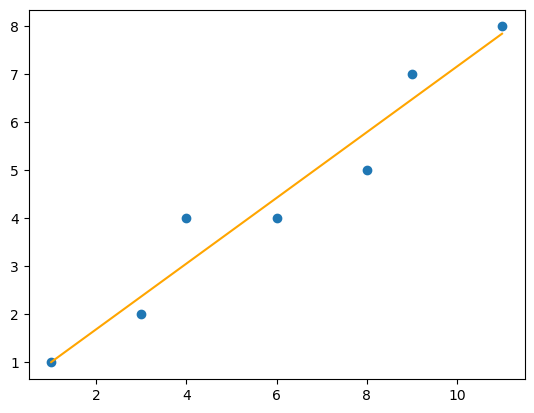

In [85]:
plt.scatter(x,y)
plt.plot(x,regression_line, c="orange")
plt.show()

In [86]:
print(result.score(x,y))
pred = result.predict(x)
print(np.sqrt(mean_squared_error(pred,y)))

0.9433811802232854
0.5523118096904349


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
"""
The to variables already showed a strong correlation before the outlier was dropped. 
Once it was gone, the we see an even stronger correlation, which makes sense. 
"""